# Prepare dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

In [ ]:
# Print the full DataFrame
print("DataFrame (df):")
print(df)

# Print shapes of training and test sets
print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


DataFrame (df):
    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0         85.0      85.0     0     0
1       1         0      0         80.0      90.0     1     0
2       0         1      0         83.0      78.0     0     1
3       0         0      1         70.0      96.0     0     1
4       0         0      1         68.0      80.0     0     1
5       0         0      1         65.0      70.0     1     0
6       0         1      0         64.0      65.0     1     1
7       1         0      0         72.0      95.0     0     0
8       1         0      0         69.0      70.0     0     1
9       0         0      1         75.0      80.0     0     1
10      1         0      0         75.0      70.0     1     1
11      0         1      0         72.0      90.0     1     1
12      0         1      0         81.0      75.0     0     1
13      0         0      1         71.0      80.0     1     0
14      1         0      0         81.0      88.0     

# Training steps

In [ ]:
# Generate 100 bootstrap samples
n_samples = len(X_train)
n_bootstraps = 100
all_bootstrap_indices = []
all_oob_indices = []

np.random.seed(42)  # For reproducibility
for i in range(n_bootstraps):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)

    # Find OOB indices
    oob_indices = list(set(range(n_samples)) - set(bootstrap_indices))

    all_bootstrap_indices.append(bootstrap_indices)
    all_oob_indices.append(oob_indices)

# Print details for samples 1, 2, and 100
samples_to_show = [0, 1, 99]

for i in samples_to_show:
    print(f"Bootstrap Sample {i+1}:")
    print(f"Chosen indices: {sorted(all_bootstrap_indices[i])}")
    print(f"Number of unique chosen indices: {len(set(all_bootstrap_indices[i]))}")
    print(f"OOB indices: {sorted(all_oob_indices[i])}")
    print(f"Number of OOB samples: {len(all_oob_indices[i])}")
    print(f"Percentage of OOB: {len(all_oob_indices[i])/n_samples*100:.1f}%")

Bootstrap Sample 1:
Chosen indices: [np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(6), np.int64(6), np.int64(7), np.int64(7), np.int64(9), np.int64(10), np.int64(10), np.int64(10), np.int64(12), np.int64(12)]
Number of unique chosen indices: 8
OOB indices: [0, 1, 5, 8, 11, 13]
Number of OOB samples: 6
Percentage of OOB: 42.9%
Bootstrap Sample 2:
Chosen indices: [np.int64(1), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(4), np.int64(5), np.int64(5), np.int64(7), np.int64(7), np.int64(7), np.int64(11), np.int64(11), np.int64(13)]
Number of unique chosen indices: 8
OOB indices: [0, 6, 8, 9, 10, 12]
Number of OOB samples: 6
Percentage of OOB: 42.9%
Bootstrap Sample 100:
Chosen indices: [np.int64(0), np.int64(1), np.int64(3), np.int64(3), np.int64(4), np.int64(7), np.int64(7), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(11), np.int64(11), np.int64(13)]
Number of unique chosen indices: 9
OOB indices: [2, 5, 6, 9, 12]
Number of OOB samples: 5


# Tree construction

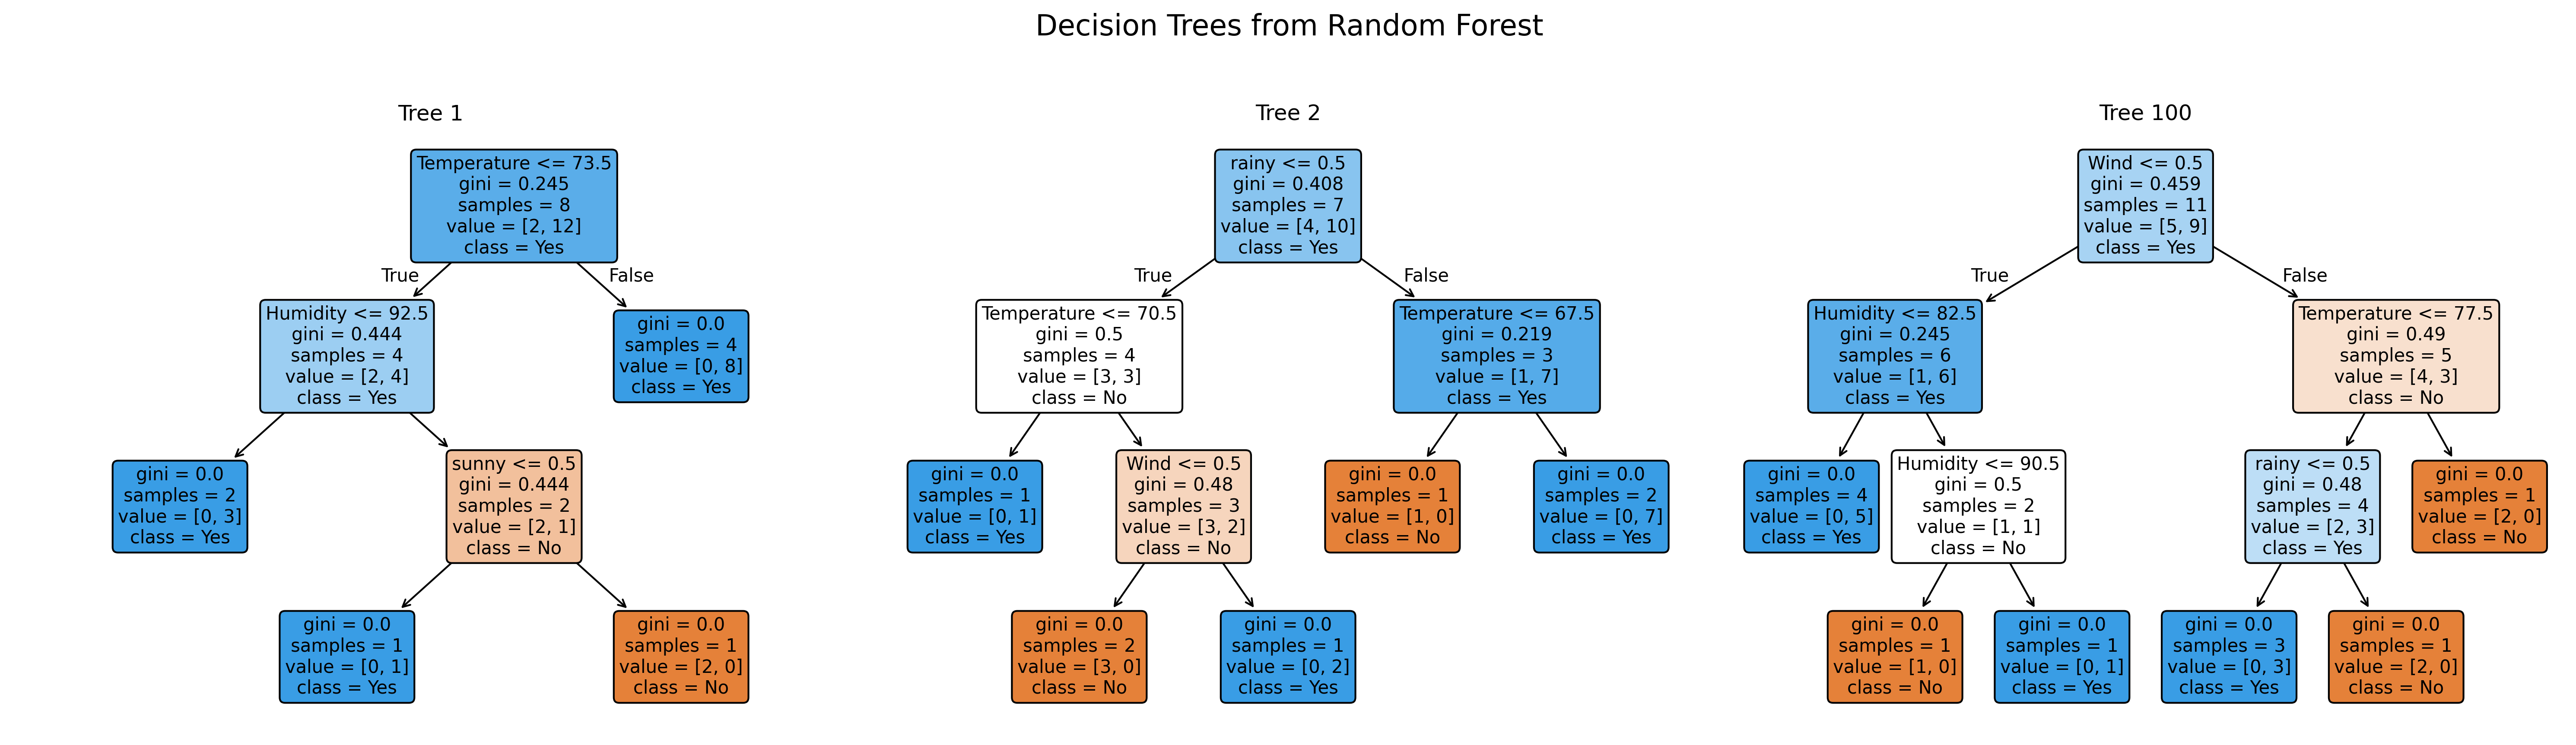

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
np.random.seed(42)  # For reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 100
trees_to_show = [0, 1, 99]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Random Forest', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(rf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Testing step

OOB Error by Number of Trees:
Trees:  10, OOB Error: 0.4286
Trees:  20, OOB Error: 0.2857
Trees:  30, OOB Error: 0.5000
Trees:  40, OOB Error: 0.3571
Trees:  50, OOB Error: 0.5000
Trees:  60, OOB Error: 0.4286
Trees:  70, OOB Error: 0.5000
Trees:  80, OOB Error: 0.5000
Trees:  90, OOB Error: 0.5000
Trees: 100, OOB Error: 0.4286
Trees: 110, OOB Error: 0.5714
Trees: 120, OOB Error: 0.6429
Trees: 130, OOB Error: 0.6429
Trees: 140, OOB Error: 0.4286
Trees: 150, OOB Error: 0.5714
Trees: 160, OOB Error: 0.5000
Trees: 170, OOB Error: 0.5000
Trees: 180, OOB Error: 0.5714
Trees: 190, OOB Error: 0.5000


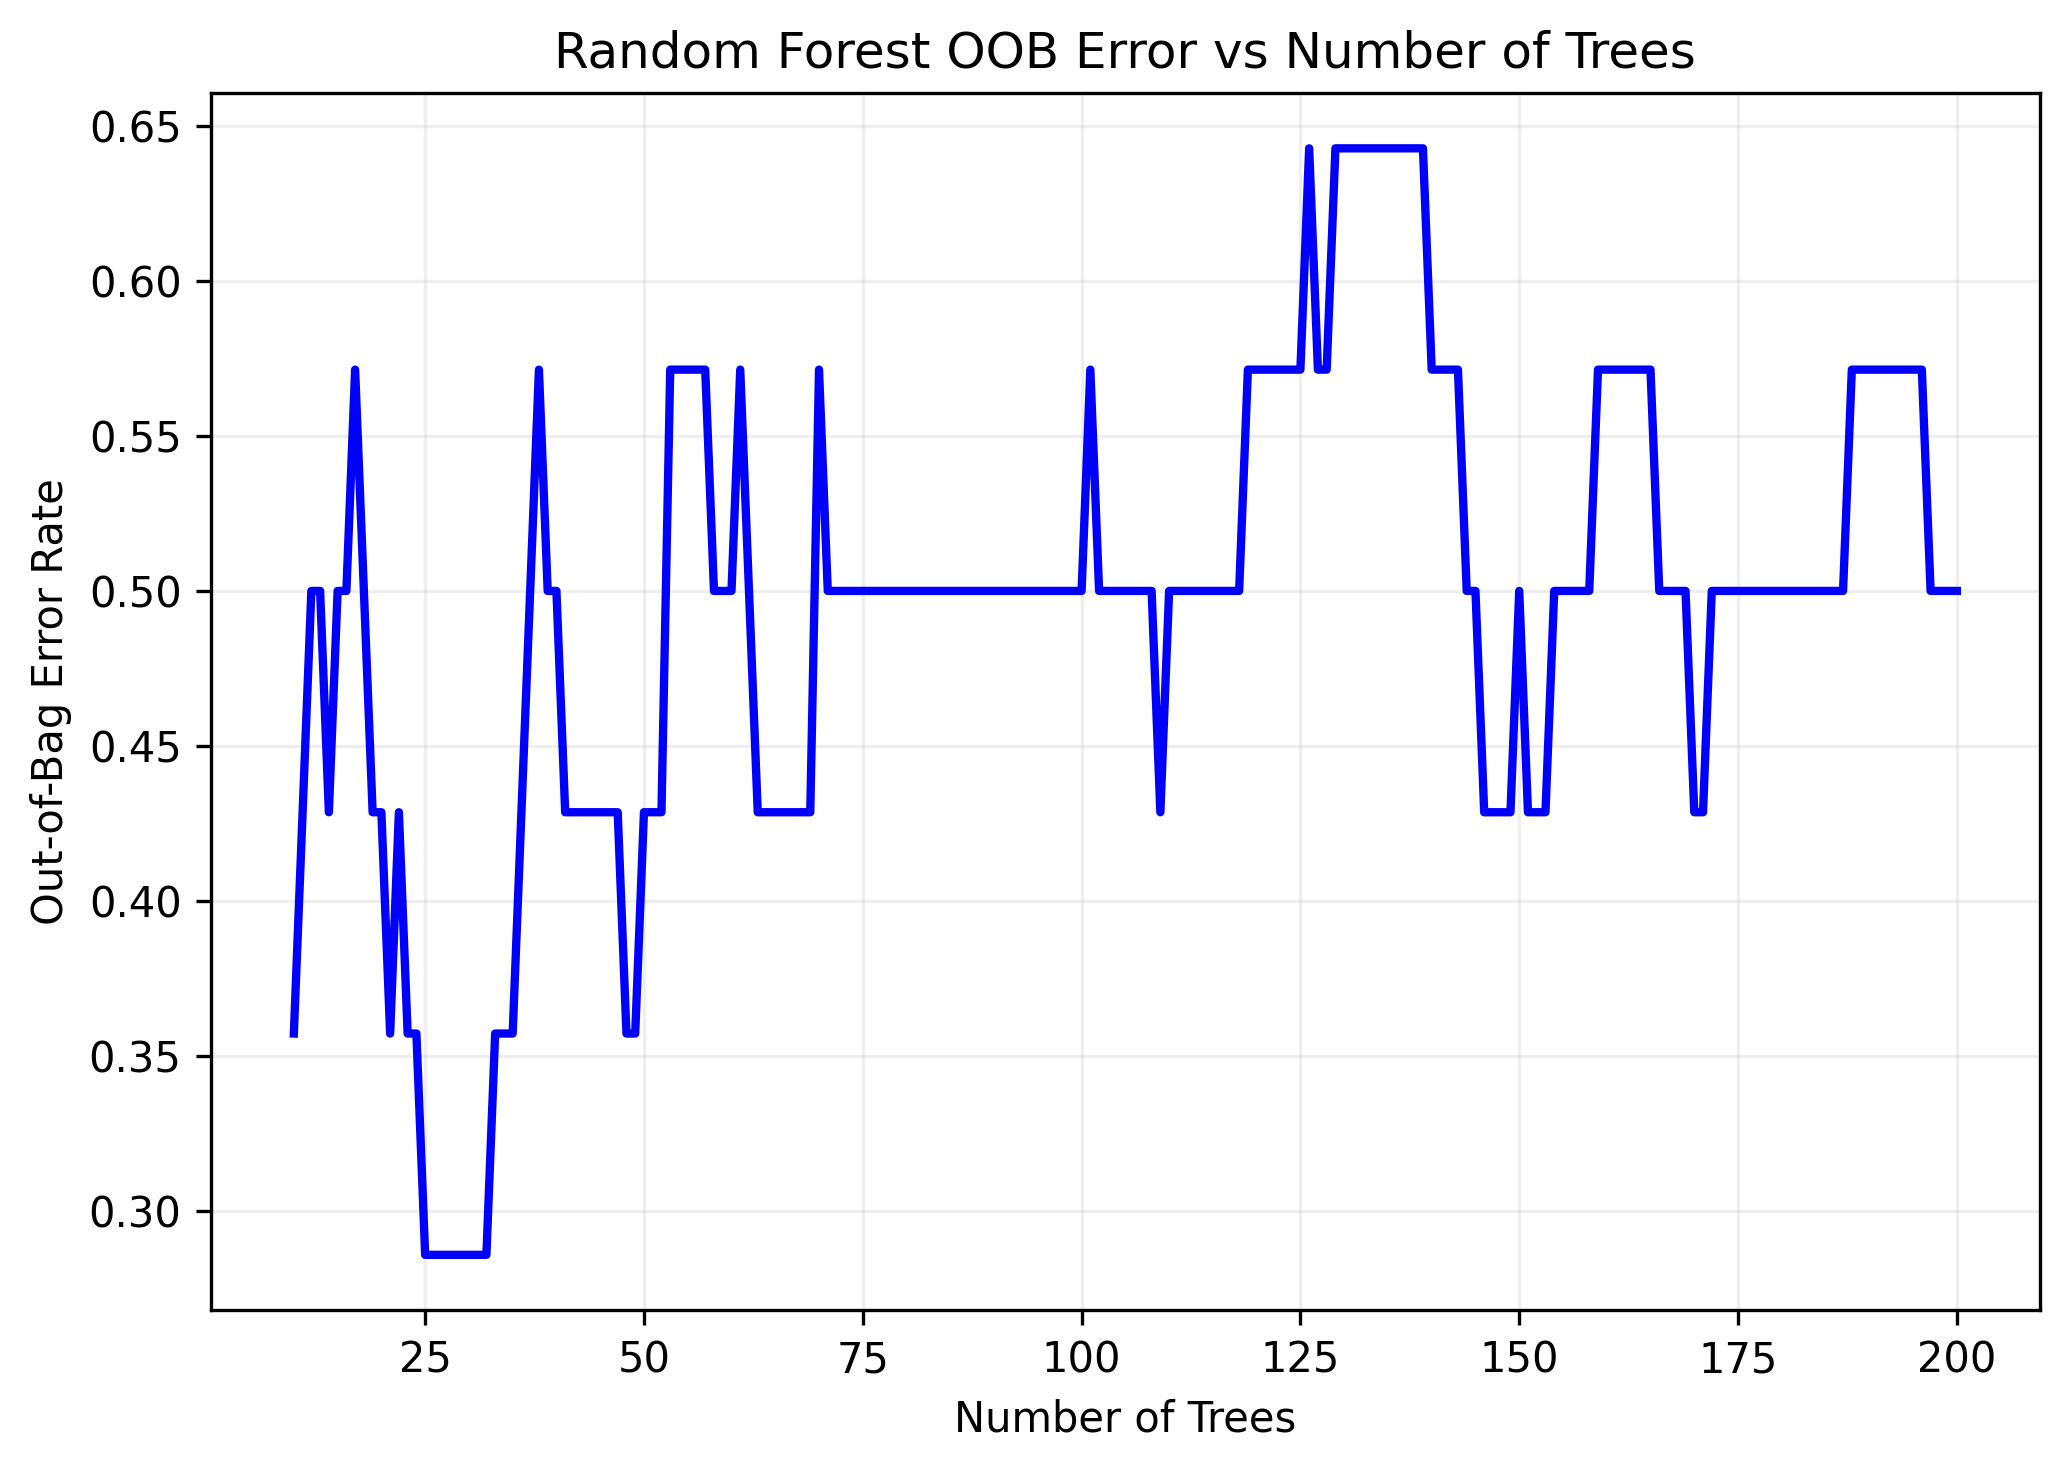

In [ ]:
# Calculate OOB error for different numbers of trees
n_trees_range = range(10, 201)
oob_errors = [
    1 - RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42).fit(X_train, y_train).oob_score_
    for n in n_trees_range
]

# Create a plot
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(n_trees_range, oob_errors, 'b-', linewidth=2)
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error Rate')
plt.title('Random Forest OOB Error vs Number of Trees')
plt.grid(True, alpha=0.2)
plt.tight_layout()

# Print results at key intervals
print("OOB Error by Number of Trees:")
for i, error in enumerate(oob_errors, 1):
    if i % 10 == 0:
        print(f"Trees: {i:3d}, OOB Error: {error:.4f}")

In [ ]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


In [ ]:
importances = rf.feature_importances_

# Make it a nice DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

       Feature  Importance
4     Humidity    0.265081
3  Temperature    0.249009
5         Wind    0.151428
1     overcast    0.138375
0        sunny    0.121037
2        rainy    0.075070


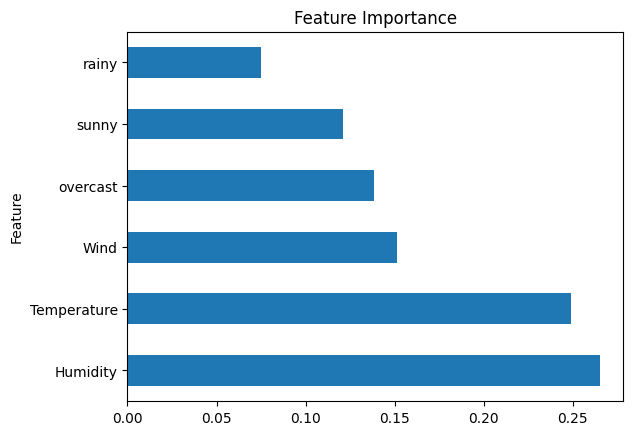

In [ ]:
import matplotlib.pyplot as plt

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

# Random forest on Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and prepare Titanic dataset
df = sns.load_dataset('titanic')

# Data Cleaning and Preprocessing
df.drop(['deck', 'who', 'adult_male', 'alive', 'alone', 'embark_town', 'class'], axis=1, inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'embarked', 'pclass'], drop_first=True, dtype=int)

# Prepare features and target
X, y = df.drop('survived', axis=1), df['survived']

# Using the same split style as the example for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

/tmp/ipython-input-1-1927239940.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1-1927239940.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Print the first few rows of the DataFrame
print("DataFrame (df) head:")
print(df.head())

# Print shapes of training and test sets
print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

DataFrame (df) head:
   survived   age  sibsp  parch     fare  sex_male  embarked_Q  embarked_S  \
0         0  22.0      1      0   7.2500         1           0           1   
1         1  38.0      1      0  71.2833         0           0           0   
2         1  26.0      0      0   7.9250         0           0           1   
3         1  35.0      1      0  53.1000         0           0           1   
4         0  35.0      0      0   8.0500         1           0           1   

   pclass_2  pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  

Shapes:
X_train: (445, 9)
X_test : (446, 9)
y_train: (445,)
y_test : (446,)


In [ ]:
# Generate 100 bootstrap samples from the training data
n_samples = len(X_train)
n_bootstraps = 100
all_bootstrap_indices = []
all_oob_indices = []

np.random.seed(42)  # For reproducibility
for i in range(n_bootstraps):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)

    # Find OOB indices
    oob_indices = list(set(range(n_samples)) - set(bootstrap_indices))

    all_bootstrap_indices.append(bootstrap_indices)
    all_oob_indices.append(oob_indices)

# Print details for samples 1, 2, and 100
samples_to_show = [0, 1, 99]

for i in samples_to_show:
    print(f"Bootstrap Sample {i+1}:")
    print(f"Number of unique chosen indices: {len(set(all_bootstrap_indices[i]))}")
    print(f"Number of OOB samples: {len(all_oob_indices[i])}")
    print(f"Percentage of OOB: {len(all_oob_indices[i])/n_samples*100:.1f}%")

Bootstrap Sample 1:
Number of unique chosen indices: 269
Number of OOB samples: 176
Percentage of OOB: 39.6%
Bootstrap Sample 2:
Number of unique chosen indices: 273
Number of OOB samples: 172
Percentage of OOB: 38.7%
Bootstrap Sample 100:
Number of unique chosen indices: 285
Number of OOB samples: 160
Percentage of OOB: 36.0%


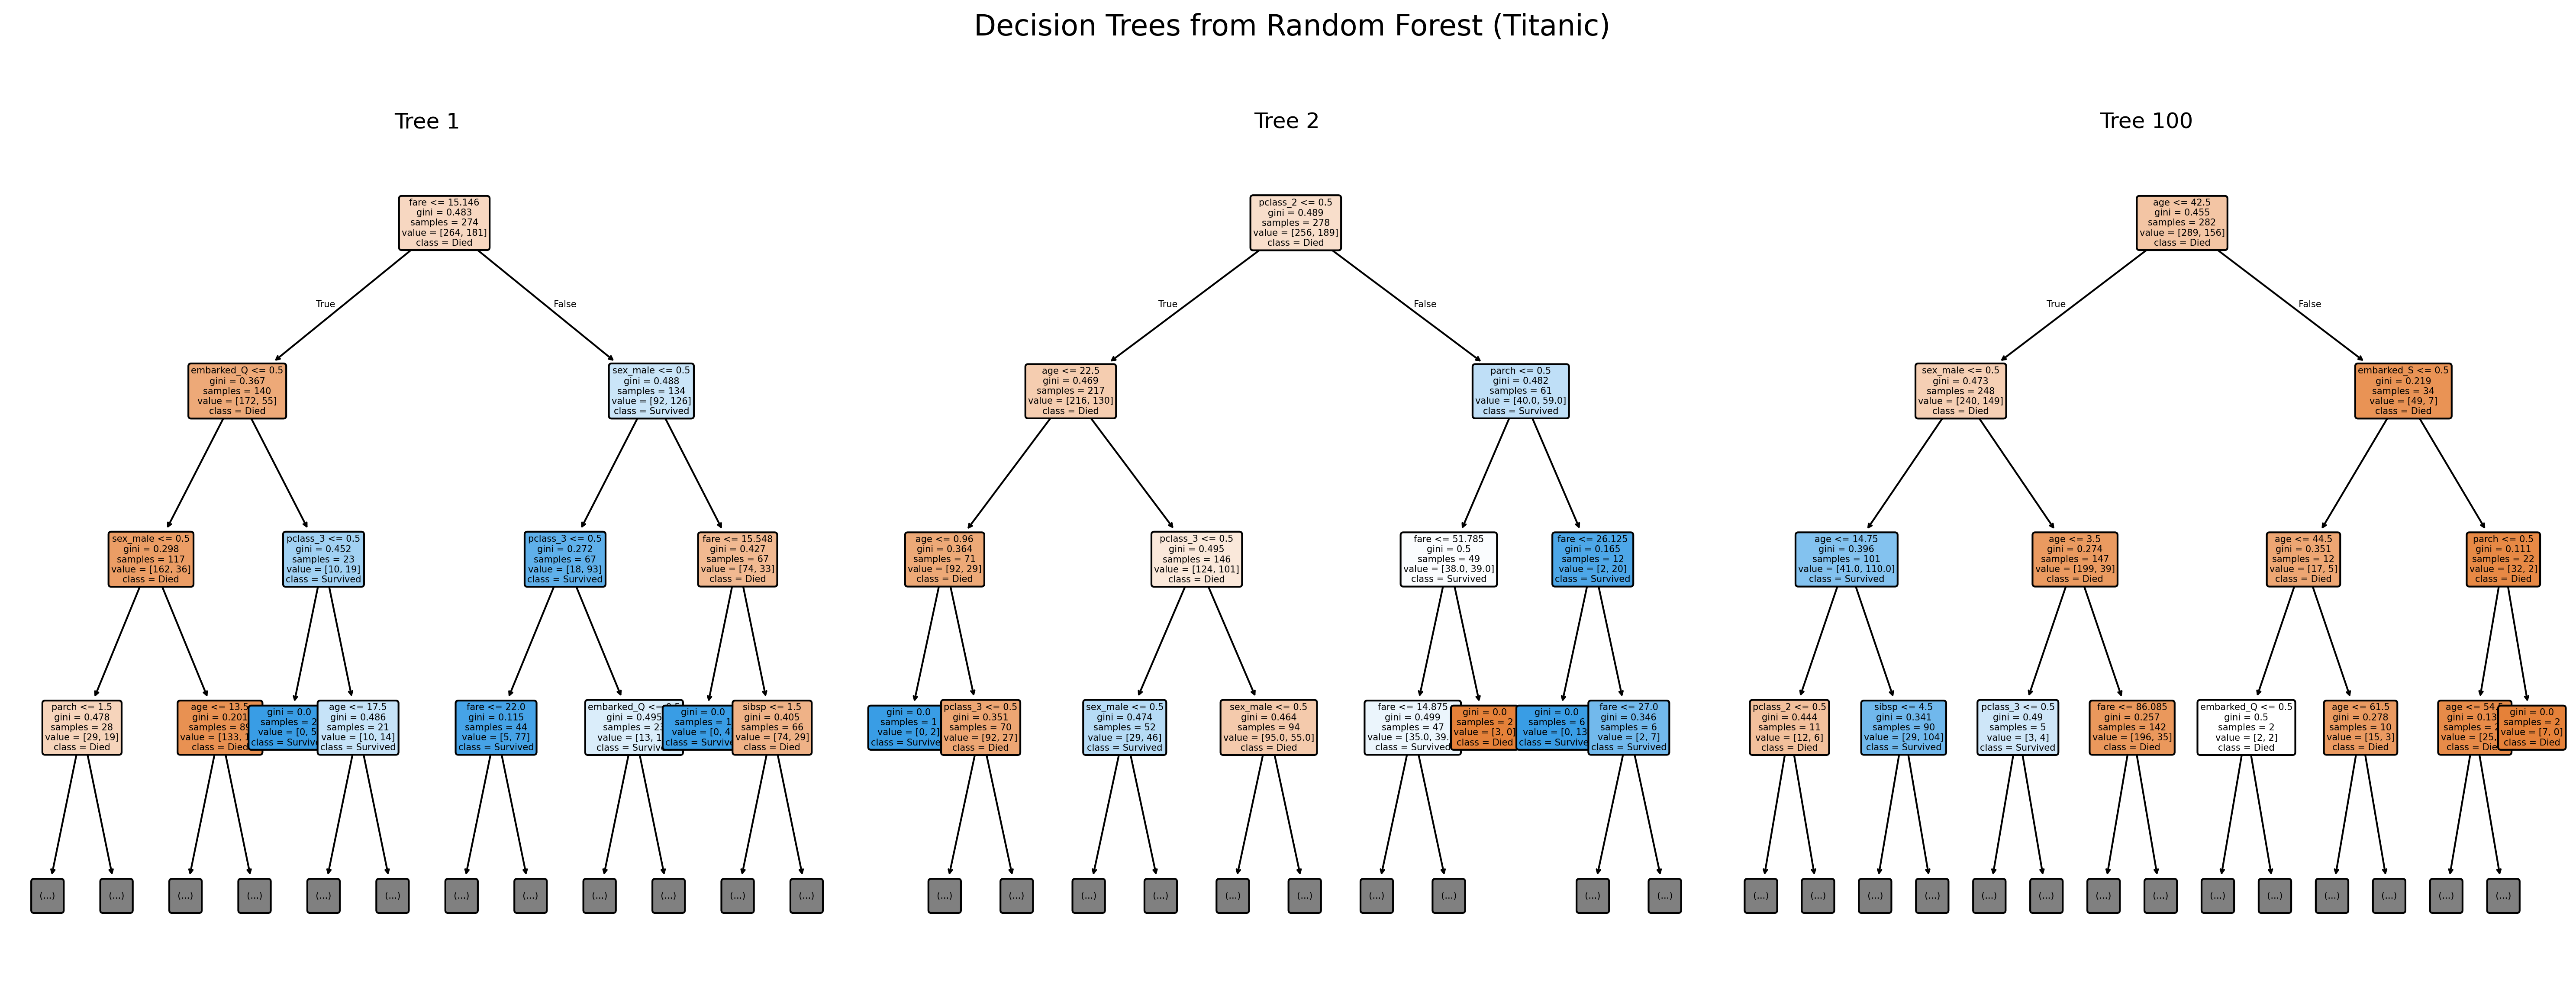

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
np.random.seed(42)  # For reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 100
trees_to_show = [0, 1, 99]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['Died', 'Survived']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 8), dpi=300)
fig.suptitle('Decision Trees from Random Forest (Titanic)', fontsize=16)

# Plot each tree (with limited depth for readability)
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(rf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=5,
              max_depth=3) # Limiting depth for visualization
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

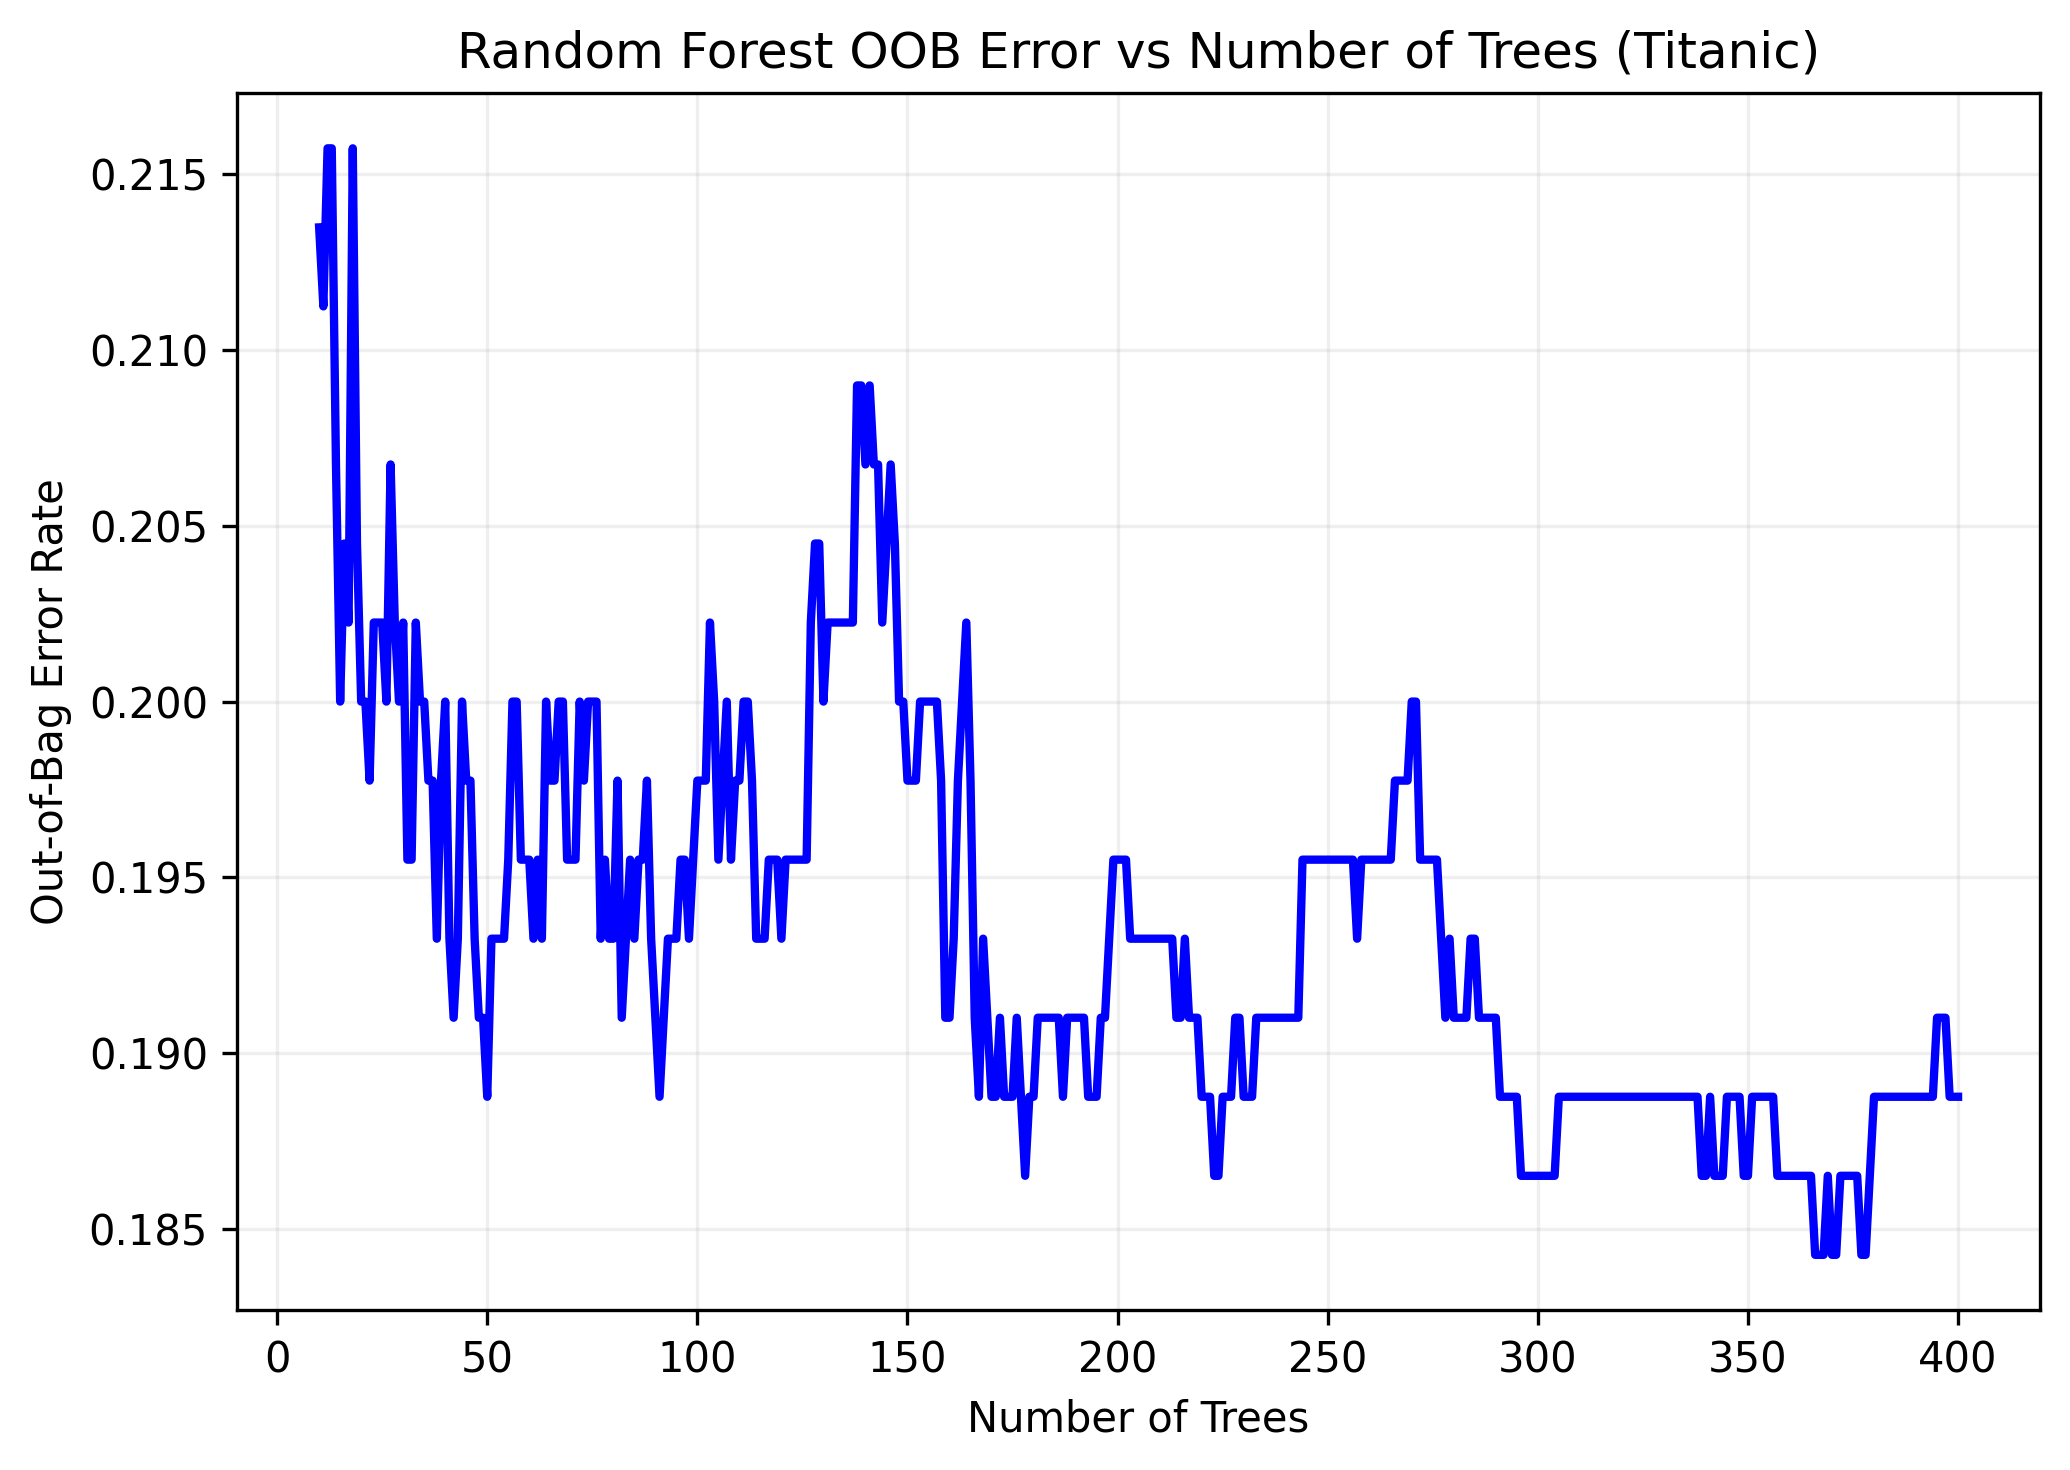

OOB Error by Number of Trees:
Trees:  20, OOB Error: 0.2000
Trees:  40, OOB Error: 0.2000
Trees:  60, OOB Error: 0.1955
Trees:  80, OOB Error: 0.1933
Trees: 100, OOB Error: 0.1978
Trees: 120, OOB Error: 0.1933
Trees: 140, OOB Error: 0.2067
Trees: 160, OOB Error: 0.1910
Trees: 180, OOB Error: 0.1888
Trees: 200, OOB Error: 0.1955
Trees: 220, OOB Error: 0.1888
Trees: 240, OOB Error: 0.1910
Trees: 260, OOB Error: 0.1955
Trees: 280, OOB Error: 0.1910
Trees: 300, OOB Error: 0.1865
Trees: 320, OOB Error: 0.1888
Trees: 340, OOB Error: 0.1865
Trees: 360, OOB Error: 0.1865
Trees: 380, OOB Error: 0.1888
Trees: 400, OOB Error: 0.1888


In [ ]:
# Calculate OOB error for different numbers of trees
n_trees_range = range(10, 401)
oob_errors = []
for n in n_trees_range:
    rf_oob = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42, n_jobs=-1)
    rf_oob.fit(X_train, y_train)
    oob_error = 1 - rf_oob.oob_score_
    oob_errors.append(oob_error)

# Create a plot
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(n_trees_range, oob_errors, 'b-', linewidth=2)
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error Rate')
plt.title('Random Forest OOB Error vs Number of Trees (Titanic)')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Print results at key intervals
print("OOB Error by Number of Trees:")
for n_trees, error in zip(n_trees_range, oob_errors):
    if n_trees % 20 == 0:
        print(f"Trees: {n_trees:3d}, OOB Error: {error:.4f}")

In [ ]:
# Predict and evaluate on the test set
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7959641255605381


In [ ]:
importances = rf.feature_importances_

# Make it a nice DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

      Feature  Importance
4    sex_male    0.298845
3        fare    0.268147
0         age    0.241174
1       sibsp    0.051479
8    pclass_3    0.042986
2       parch    0.036607
6  embarked_S    0.024609
5  embarked_Q    0.021077
7    pclass_2    0.015075


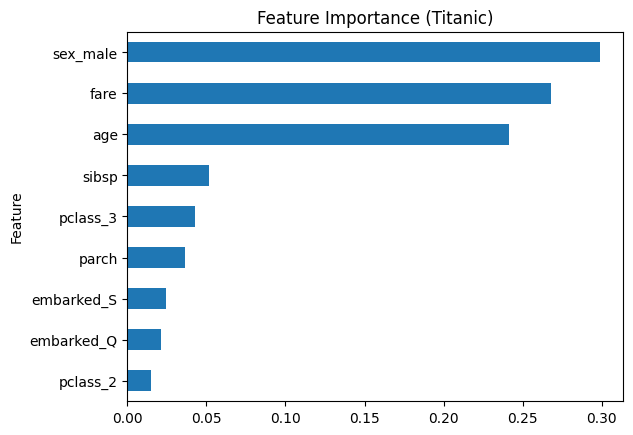

In [ ]:
import matplotlib.pyplot as plt

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis() # Highest importance at the top
plt.title('Feature Importance (Titanic)')
plt.show()